# Linear regression without using Sklearn using batch gradient descent
Linear regression is one of the simplest machine learning models, but understanding the algorithm lays the foundation for understanding more complex algorithms. In a machine learning context, the algorithm can be broken down into the following steps:
- Create a cost function
- Find the derivative of the cost function
- Apply gradient descent to optimize the parameters
- Take the dot product of the test features and the optimized parameters to find the predicted target values

All machine learning models involve minimizing some cost function, and this is generally done with gradient descent. Gradient descent is an iterative process where the parameters are gradually tuned by finding the derivative of the cost function which gives us the direction of greatest descent of the cost function. In this tutorial, I will show the steps to build a linear regression model without relying on prebuilt machine learning packages.

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [402]:
data = pd.read_csv("data/tvmarketing.csv")
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [392]:
# split the data into train and test
data = data.sample(frac = 1, random_state=42)
train, test = data.iloc[0:int(len(data) * .8), :], data.iloc[int(len(data) * .8) + 1:, :]
x_train, y_train = np.array(train.iloc[:, train.columns != 'Sales']), np.array(train['Sales'])
x_test, y_test = np.array(test.iloc[:, test.columns != 'Sales']), np.array(test['Sales'])


In [393]:
def least_squared_error(y_pred, y):
    """Calculate least squared error given the predicted and actual y values"""
    return .5 * (y_pred - y)**2

In [394]:
def cost_func(X, theta, y):
    """The """
    return (1 / (2 * len(y))) * sum((np.dot(X, theta) - y)**2)

In [395]:
def cost_deriv(X, coefs, j, y):
    return np.dot(X[:, j], np.dot(X, coefs) - y)

In [396]:
def gradient_descent(x_train, y_train, learning_rate):

    theta = np.array([0.0 for i in range(x_train.shape[1])])
    theta_temp = np.array([0.0 for i in range(x_train.shape[1])])
    for i in range(50): 
        for j in range(len(theta)):
            theta_temp[j] = theta[j] - learning_rate * (1 / (len(y_train))) * cost_deriv(X=x_train, coefs=theta, j=j, y=y_train)
        theta = theta_temp
    return theta

x_train_int = np.insert(x_train, 0, 1, axis=1) 
theta = gradient_descent(x_train_int, y_train, .00001)
intercept = theta[0]
coefs = theta[1:]

62.29131110795907
37.34149332076739
24.665233111454047
18.224792323211975
14.952581313350272
13.290051677556438
12.4453525632038
12.016168651635846
11.798095716476572
11.687282121380306
11.630963946024364
11.602333394808959
11.587770200705503
11.580354288712792
11.576569755645261
11.57463026071566
11.573628205891627
11.573102459093121
11.572818726562657
11.572657966047792
11.57255969241836
11.572493172599295
11.572442790320354
11.572400610194427
11.572362599611086
11.572326709094607
11.572291896920083
11.572257633498802
11.572223649534733
11.572189808044078
11.57215603931359
11.572122307841434
11.57208859553127
11.572054893146879
11.57202119596572
11.57198750156702
11.571953808705675
11.571920116738232
11.571886425330048
11.571852734305574
11.57181904357172
11.571785353078365
11.571751662798054
11.571717972715412
11.571684282821634
11.5716505931115
11.571616903581845
11.571583214230717
11.571549525056822
11.571515836059355


In [400]:
y_pred = np.dot(x_test, coefs) + intercept

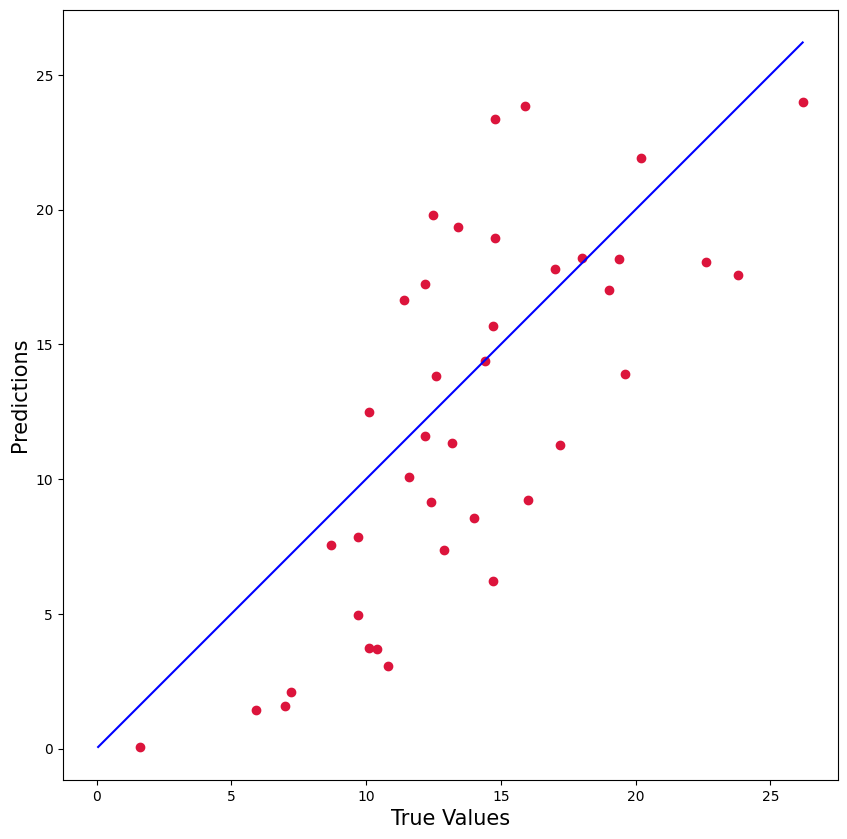

In [401]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()